In [15]:
# Settings
Sys.setlocale(category = "LC_ALL", locale = "ko_KR.UTF-8")
options(warn =-1,scipen = 100)

    library(stringr) # stringr 불러오기
    library(dplyr) # dplyr 불러오기
    library(plotrix) # 3D pie
    library(RColorBrewer) # color package
# Basic functions
checkData <- function(data){
    ##필요한 설정들 
    options(warn = -1) ## 경고 지우기
    options(repr.plot.width=8, repr.plot.height=6) # 플랏 크기 조절
    Sys.setlocale(category = "LC_ALL", locale = "ko_KR.UTF-8") # 한글 설정
    library(stringr) # stringr 불러오기
    library(dplyr) # dplyr 불러오기
    par(family ="AppleGothic",bg='grey') # 그래프 배경및 한글설정
    
    cat("*****************(1.DATA HEAD)*****************\n\n");
        print(head(data,2))
    cat("******************************************************************\n\n");
    cat("*****************(2.DATA TAIL)*****************\n\n");
        print(tail(data,2))
    cat("******************************************************************\n\n");
    cat("*****************(3.DATA Structure)*****************\n\n");
        str(data)
    cat("******************************************************************\n\n");
    # data 의 기본 통계량 보기
    cat("*****************(4.DATA Summary)*****************\n\n");
        print(summary(data))
    cat("******************************************************************\n\n");
    cat("*****************(5.NA check)*****************\n\n");
        cat(" 5.1 Data 전체에서의 NA 개수:", sum(is.na(data)),"\n\n")
        # 컬럼 별 na 확인
        cat(" 5.2 Column 별 NA check \n")
        for(i in 1:ncol(data)){
            cat("  col[",colnames(data[i]), "] --> NA 개수:",(sum(is.na(data[,i]))),"\n")
        }
        ## 컬럼별 na 합계 계산. 
        cat("column 별 na 합계 \n",colSums(is.na(data)) ,"\n")
    cat("******************************************************************\n\n");
    cat("*****************(6.Colum 별 data 빈도수 형평성 검사)*****************\n\n");
    #A 컬럼의 최대값 최소값 빈도수
    for(i in 1:ncol(data)){
        #cat("-----",colnames(data)[i] ," 컬럼의 빈도 분석결과----- \n")
        cat("최빈값:",max(table(data[,i])), "최소빈도값 :", min(table(data[,i])), "\n")
        barplot(table(data[,i]),

            main = paste(colnames(data)[i] ," 컬럼의 데이터 별 빈도 분석 \n"),
            ylab = "빈도수",
            xlab = "데이터값",
        )
        
        cat("\n")
        # 각 컬럼의 빈도수의 최대값, 최소값 구하기 
        cat(colnames(data)[i],"컬럼의 빈도수의 최대값과 최소값\n")

    }
    
 
}
## 결측치 보상 함수 
replaceNa <-function(data){
    #data 는 vector 

    # 결측치를 무조건 제거하면 통계량을 얻을수 없으며, 데이터 손실로 문제 발생
    # 1)결측치를 제거하고 평균구하기
    meanDeleteNa <-mean(data,na.rm = T)
    cat( " >> 결측치를 제거후 평균 : ", meanDeleteNa)

    # 2) NA를 0 으로 대체하여 평균구해보기 
    meanRepZero <-mean(ifelse(is.na(data),0,data))
    cat( "\n >> 결측치를 0으로 대체후 평균 : ", meanRepZero)

    # 3) NA 를 중앙값으로 대체하여 평균구해보기
    meanRepMedian <- mean(ifelse(is.na(data),median(data,na.rm = T),data))
    cat("\n >> 결측치를 중앙값(", median(data,na.rm = T),")으로 대체후 평균: ", meanRepMedian,sep="" )

    # 4) NA 를 최소값으로 대체하여 평균 구해보기
    meanRepMin <- mean(ifelse(is.na(data), min(data,na.rm = T),data))
    cat("\n >> 결측치를 최소값(",min(data,na.rm = T), ")으로 대체후 평균 : ",meanRepMin,sep="" )

    meanRepMax <- mean(ifelse(is.na(data), max(data,na.rm = T),data))
    cat("\n >> 결측치를 최대값(",max(data,na.rm = T), ")으로 대체후 평균 : ",meanRepMax,sep="" )
    
    meanRep1Qt <-mean(ifelse(is.na(data), quantile(data,0.25,na.rm = T),data))
    cat("\n >> 결측치를 1사분위(",quantile(data,0.25,na.rm = T), ")으로 대체후 평균 : ",meanRep1Qt,sep="" )

    meanRep2Qt <-mean(ifelse(is.na(data), quantile(data,0.5,na.rm = T),data))
    cat("\n >> 결측치를 2사분위(",quantile(data,0.5,na.rm = T), ")으로 대체후 평균 : ",meanRep2Qt,sep="" )

    meanRep3Qt <-mean(ifelse(is.na(data), quantile(data,0.75,na.rm = T),data))
    cat("\n >> 결측치를 3사분위(",quantile(data,0.75,na.rm = T), ")으로 대체후 평균 : ",meanRep3Qt,sep="" )

    meanRep4Qt <-mean(ifelse(is.na(data), quantile(data,1,na.rm = T),data))
    cat("\n >> 결측치를 4사분위(",quantile(data,1,na.rm = T), ")으로 대체후 평균 : ",meanRep4Qt,sep="" )
    
    ## 최적 결측치 대체 값 계산
    meanReps<-c(meanRep1Qt,meanRep2Qt,meanRep3Qt,meanRep4Qt,meanRepMax,meanRepMin,meanRepMedian,meanRepZero)
    names(meanReps)<-c("1사분위","2사분위","3사분위","4사분위","최대값","최소값","중앙값","0")
    minimum_meanReps<-min(abs(meanReps-mean(data,na.rm = T)))
    meanRepOptimum <-sum(ifelse(abs(meanReps-mean(data,na.rm = T)) == minimum_meanReps,meanReps,0))
    cat ("\n")
    meanRepOptName<-names(meanReps)[which(meanReps== meanRepOptimum)]
    cat("\n >> 최적 대체 => ",meanRepOptName ,"(",meanRepOptimum ,")")


}
## Legend 세팅 함수
setLegend <- function(x,y,xpos,ypos){
    legend(
        trunc(x[,1][trunc(length(x[,1])*xpos)]), # x location of legend
        max(y)*ypos, # y location of legend
        c("Female","Male"),
        #lty= c(1,2),
        fill =c("orange","blue"),
    )
}

[1] "ko_KR.UTF-8/ko_KR.UTF-8/ko_KR.UTF-8/C/ko_KR.UTF-8/C"

# 서울 반찬가게 상권분석 
 데이터 출처 :서울시 열린데이터 광장 <a href ="http://data.seoul.go.kr/dataList/OA-15572/S/1/datasetView.do">서울시 상권분석서비스(추정매출-상권)</a>




In [2]:
# 2019~2022년도 상권분석 데이터 Fetch
trade19<-read.csv("../Data/SeoulPublicShareData/서울시_상권분석서비스(추정매출-상권)_2019년.csv", fileEncoding = "EUC-KR")
trade20<-read.csv("../Data/SeoulPublicShareData/서울시_상권분석서비스(추정매출-상권)_2020년.csv", fileEncoding = "EUC-KR")
trade21<-read.csv("../Data/SeoulPublicShareData/서울시_상권분석서비스(추정매출-상권)_2021년.csv", fileEncoding = "EUC-KR")
trade22<-read.csv("../Data/SeoulPublicShareData/서울시_상권분석서비스(추정매출-상권)_2022년.csv", fileEncoding = "EUC-KR")

## 서울시 반찬가게의 상권분석을 위해 필요한 파라미터(데이터 칼럼) 정제

    1. 기준_년분기_코드 
    3. 상권_구분_코드_명 
    5. 상권_코드_명
    7. 서비스_업종_코드_명
    8. 당월_매출_금액
    9. 당월_매출_건수
    10. 주중_매출_금액
    11. 주말_매출_금액
    25. 남성_매출_금액
    26. 여성_매출_금액
    27. 연령대_10_매출_금액
    28. 연령대_20_매출_금액
    29. 연령대_30_매출_금액
    30. 연령대_40_매출_금액
    31. 연령대_50_매출_금액
    32. 연령대_60_이상_매출_금액
    48. 남성_매출_건수
    49. 여성_매출_건수

In [3]:
# 필요한 colum 
banchan2019 <- arrange(subset(trade19[,c(1,3,5,7:11,25:32,48:49)],서비스_업종_코드_명	=="반찬가게"), desc(당월_매출_금액))
banchan2020 <- arrange(subset(trade20[,c(1,3,5,7:11,25:32,48:49)],서비스_업종_코드_명	=="반찬가게"), desc(당월_매출_금액))
banchan2021 <- arrange(subset(trade21[,c(1,3,5,7:11,25:32,48:49)],서비스_업종_코드_명	=="반찬가게"), desc(당월_매출_금액))
banchan2022 <- arrange(subset(trade22[,c(1,3,5,7:11,25:32,48:49)],서비스_업종_코드_명	=="반찬가게"), desc(당월_매출_금액))
banchan<-rbind(banchan2019,banchan2020,banchan2021,banchan2022)

# 1. 연도별 매출총액 추이

In [4]:
# 년분기 매출액  테이블 
head(banchan[,c(1,5:6)])

#년도별 매출액 합계
banchan_year<-aggregate(당월_매출_금액~기준_년분기_코드, banchan, sum)

#년도별 매출건수 합계
banchan_year_num<-aggregate(당월_매출_건수~기준_년분기_코드, banchan, sum)
banchan_year$당월_매출_건수 <- banchan_year_num$당월_매출_건수

# 년분기 코드 출력
banchan_year$`기준_년분기_코드`

# 년도 데이터 생성 
years <-substring(banchan_year$`기준_년분기_코드`, first = 1, last =4); # years
banchan_year$년도<- as.integer(years)

# 분기 데이터 생성
quants<-substring(banchan_year$`기준_년분기_코드`, 5); #quants
banchan_year$분기<-as.integer(quants);# banchan_year

#년도별 매출액 합계
banchan_year_result<-aggregate(당월_매출_금액~년도 , banchan_year, sum)
colnames(banchan_year_result) <- c("년도","총매출액")
rownames(banchan_year_result) <- banchan_year_result$년도
banchan_year_result<-t(banchan_year_result)

#년도별 매출건수 합계
banchan_year_건수<-aggregate(당월_매출_건수~년도 , banchan_year, sum)
colnames(banchan_year_건수) <- c("년도","총매출 건수")
rownames(banchan_year_건수) <- banchan_year_건수$년도
banchan_year_건수<-t(banchan_year_건수)


,기준_년분기_코드,당월_매출_금액,당월_매출_건수
,<int>,<dbl>,<int>
1,20194,228487398905,4386620
2,20192,200604978040,4113614
3,20193,197092532279,4003377
4,20191,190050936547,4022755
5,20191,24612000000,2599703
6,20192,24612000000,2480622


[1] 20191 20192 20193 20194 20201 20202 20203 20204 20211 20212 20213 20214
[13] 20221 20222 20223 20224

,2019,2020,2021,2022
년도,2.019000e+03,2.020000e+03,2.021000e+03,2.022000e+03
총매출액,2.257417e+12,2.182109e+12,2.477793e+12,2.853658e+12


1234

,2019,2020,2021,2022
년도,2019,2020,2021,2022
총매출 건수,70421182,67906921,82117449,92861157


1234

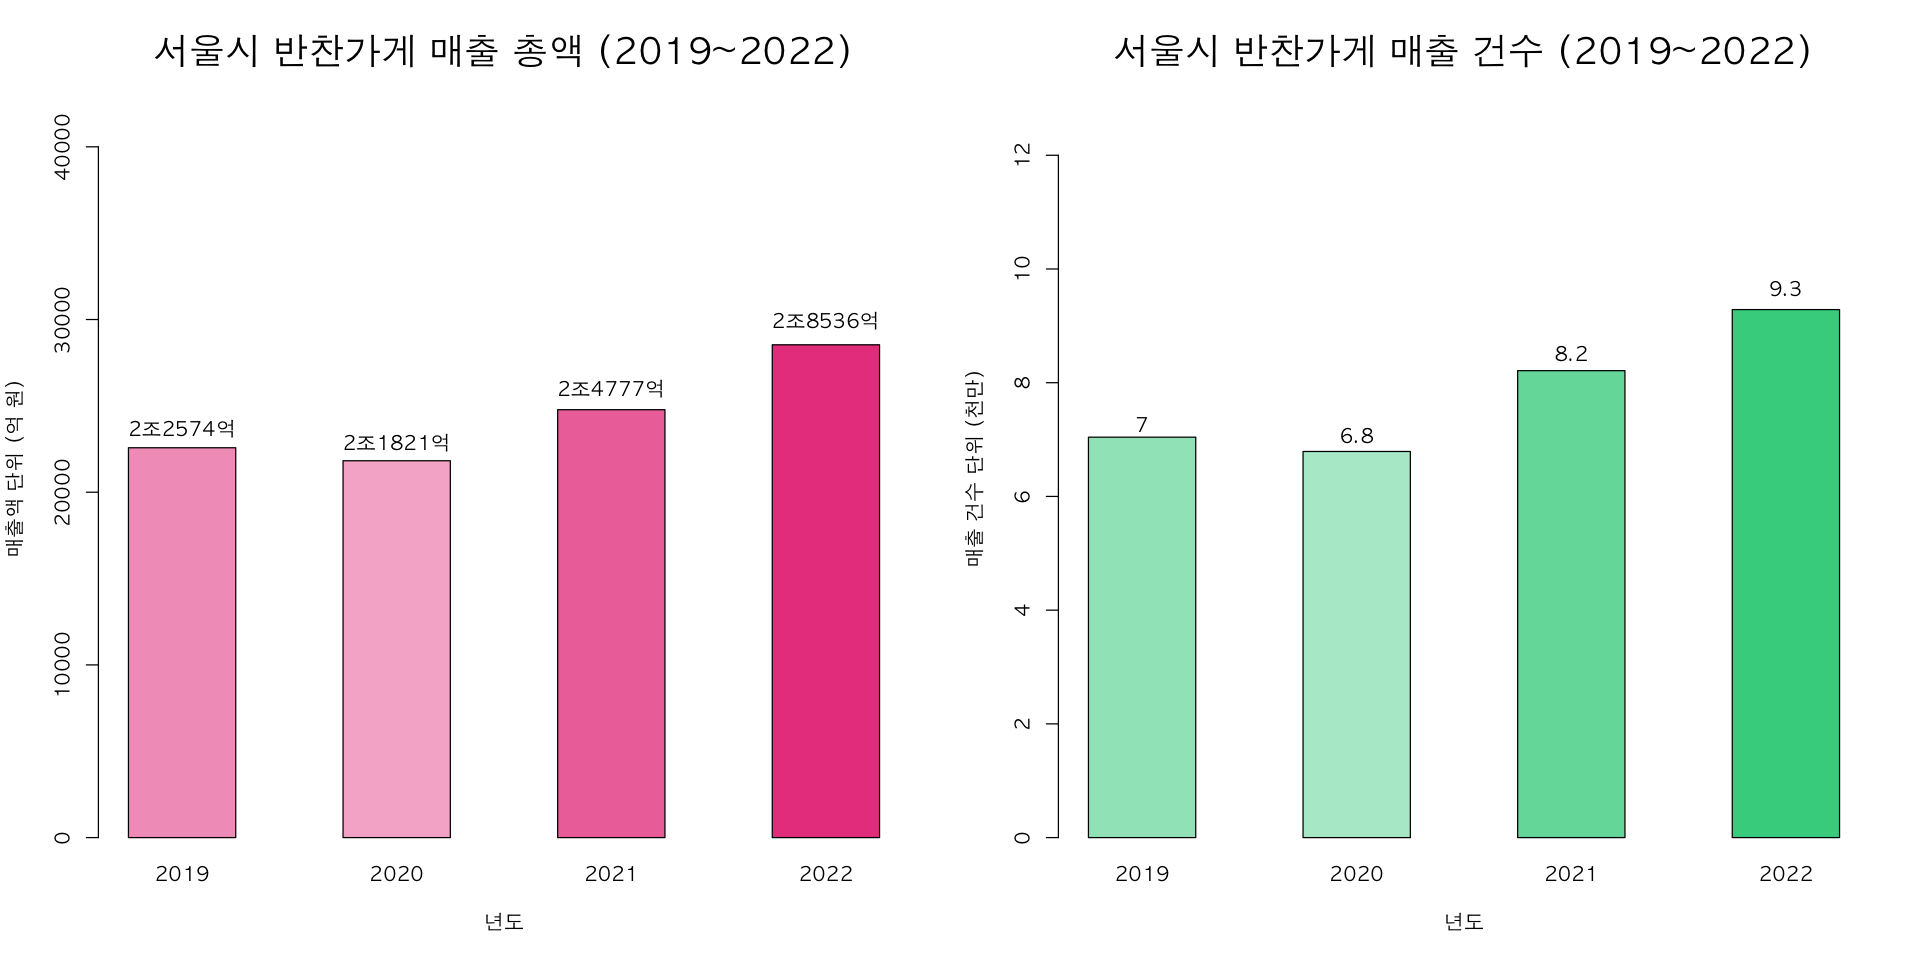

In [5]:
banchan_year_result
par(bg ='white', family= 'applegothic')
par( mfrow = c(1,2)) #  plot 의 행열
options(repr.plot.width =16, repr.plot.height = 8)
mycol <- rgb(0.9,0.2,0.5,c(0.5,0.4,0.7,0.9))
x<-round(banchan_year_result[2,]/100000000,2)
barplot(x,
    space = 1,
    main = "서울시 반찬가게 매출 총액 (2019~2022)",
    col = mycol,
    ylab = "매출액 단위 (억 원)",
    xlab = "년도",
    ylim = c(0,trunc(max(x)*1.5)),
    cex.main =1.8
)
#text(1.5,trunc(x[1])*1.05,paste(trunc(x[1]/1000),"조", trunc(x[1]%%1000), "억",sep = ""))
xpos_amount<-1.5 
for(i in seq(1,length(x),1)){
    cat(i)
    text(xpos_amount, # x 위치
        trunc(x[i])*1.05,paste(trunc(x[i]/10000),"조", trunc(x[i]%%10000), "억",sep = "")) # y위치
    xpos_amount <- xpos_amount +2
}

##
banchan_year_건수
par(bg ='white', family= 'applegothic')
mycol <- rgb(0.1,0.8,0.5,c(0.5,0.4,0.7,0.9))
x<-banchan_year_건수[2,]/10000000
barplot(x,
    space = 1,
    main = "서울시 반찬가게 매출 건수 (2019~2022)",
    col = mycol,
    ylab = "매출 건수 단위 (천만)",
    xlab = "년도",
    ylim = c(0,trunc(max(x)*1.5)),
    cex.main =1.8
)
#text(1.5,trunc(x[1])*1.05,paste(trunc(x[1]/1000),"조", trunc(x[1]%%1000), "억",sep = ""))
xpos_amount<-1.5 
for(i in seq(1,length(x),1)){
cat(i)
text(xpos_amount, # x 위치
    round(x[i],1)*1.04,# y위치
    paste(round(x[i],1),sep = "")) 
xpos_amount <- xpos_amount +2
}


,2019,2020,2021,2022
년도,1.00,1.00,1.00,1.00
총매출액,32055.93,32133.82,30173.77,30730.37


1234

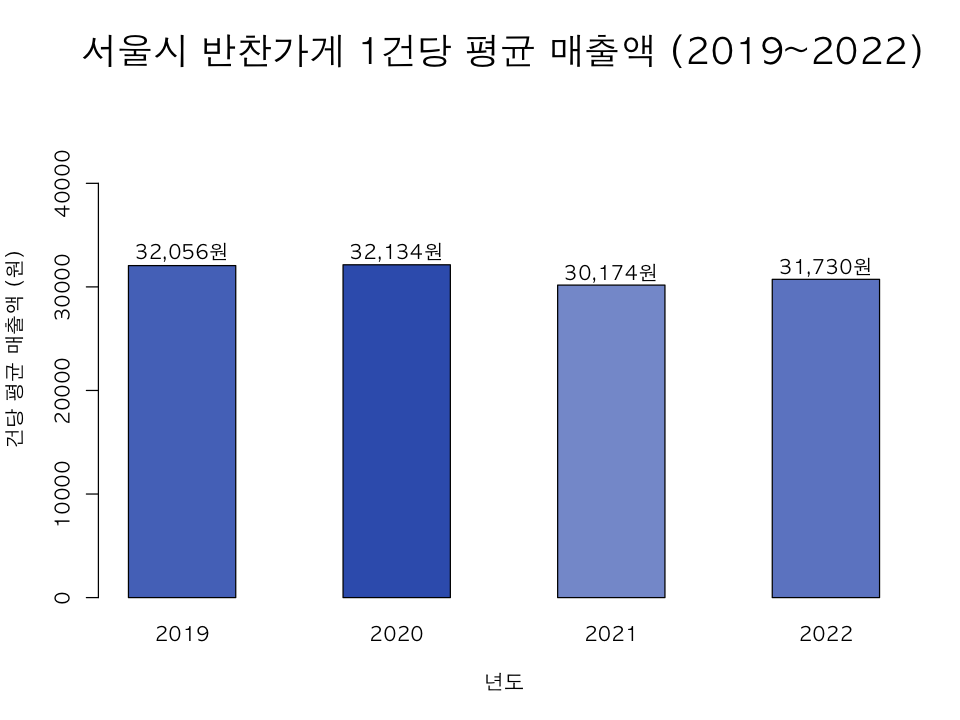

In [6]:
## 건당 매출액 그래프
par( mfrow = c(1,1)) #  plot 의 행열
options(repr.plot.width =8, repr.plot.height = 6)
##
banchan_year_rate<-banchan_year_result/banchan_year_건수
banchan_year_rate
par(bg ='white', family= 'applegothic')
mycol <- rgb(0.1,0.3,0.7,c(0.8,0.9,0.6,0.7))
x<-banchan_year_rate[2,]
barplot(x,
    space = 1,
    main = "서울시 반찬가게 1건당 평균 매출액 (2019~2022)",
    col = mycol,
    ylab = "건당 평균 매출액 (원)",
    xlab = "년도",
    ylim = c(0,trunc(max(x)*1.5)),
    cex.main =1.8
)
#text(1.5,trunc(x[1])*1.05,paste(trunc(x[1]/1000),"조", trunc(x[1]%%1000), "억",sep = ""))
xpos_amount<-1.5 
for(i in seq(1,length(x),1)){
    cat(i)
    text(xpos_amount, # x 위치
        round(x[i],1)*1.04,# y위치
        paste(round(x[i]/1000,0),",",ifelse(round(x[i]%%1000,0)<100,paste("0",round(x[i]%%1000,0),sep=""),round(x[i]%%1000,0)),"원",sep = "")) 
    xpos_amount <- xpos_amount +2
}

<결과 분석>>
- 2020년도 이후  매년 3천억 가량 매출액 증가
- 2020 년도 이후 매년 매출 건수가 증가
- 2020 년도 이후 건당 매출액은 감소

<stong>결론 :</strong> 
       <p> 전체 매출액이 줄었다는 것은 한번 살 때 적은양으로 사고 더 자주 이용하거나, <br>
              기존보다 더 많은 사람들이 반찬가게를 이용하고 있음. <br>
              특히 2020 년도에는 사람들이 한꺼번에 반찬을 많이 구매하였다는 것을 알 수 있음. <br>
              20년에 발생한 코로나의 영향으로 사람들이 주춤하다가 21년도부터는 반찬가게에서 배달을 하는 경우도 많아졌기때문에 오히려 반찬가게 이용빈도수가 높아지고<br>
              한번에 반찬을 많이 살 필요가 없어진것으로 알수있음.</p>
       


# 2. 연도별 남녀 매출액 비교, 매출건수 비교 

In [7]:
# 년분기 매출건수, 매출액  테이블 
head(banchan[,c(1,5:6,17:18,9:10)])
banchan_target<-banchan[,c(1,5:6,17:18,9:10)]

# 기준_년분기_코드 별 매출 건수, 금액 (남,녀)
남성매출건수 <-aggregate(남성_매출_건수	~기준_년분기_코드, banchan_target, sum)
남성매출금액 <-aggregate(남성_매출_금액	~기준_년분기_코드, banchan_target, sum)
여성매출건수 <-aggregate(여성_매출_건수	~기준_년분기_코드, banchan_target, sum)
여성매출금액 <-aggregate(여성_매출_금액	~기준_년분기_코드, banchan_target, sum)

# 년도,분기 데이터 추가
banchan_year_남녀$년도 <-as.integer(substring(banchan_year$`기준_년분기_코드`, first = 1, last =4)); # years
banchan_year_남녀$분기 <-as.integer(substring(banchan_year$`기준_년분기_코드`, 5));

# 남성 매출 건수, 금액 데이터 추가
banchan_year_남녀$남성매출건수 <-남성매출건수$남성_매출_건수
banchan_year_남녀$남성매출금액 <-남성매출금액$남성_매출_금액

# 여성 매출 건수, 금액 데이터 추가
banchan_year_남녀$여성매출건수 <-여성매출건수$여성_매출_건수
banchan_year_남녀$여성매출금액 <-여성매출금액$여성_매출_금액

# 분기별로 되어있는것을 년도별로 합침.
banchan_y_결과.남매출 <-aggregate(남성매출금액~년도,banchan_year_남녀,sum)
banchan_y_결과.여매출 <-aggregate(여성매출금액~년도,banchan_year_남녀,sum)
banchan_y_결과.남건수 <-aggregate(남성매출건수~년도,banchan_year_남녀,sum)
banchan_y_결과.여건수 <-aggregate(여성매출건수~년도,banchan_year_남녀,sum)

# 데이터 프레임 생성
banchan_y_결과 <- data.frame( 년도=banchan_y_결과.남$년도,
                            남성매출금액 = banchan_y_결과.남매출$남성매출,
                            여성매출금액 = banchan_y_결과.여매출$여성매출,
                            남성매출건수 = banchan_y_결과.남건수$남성매출,
                            여성매출건수 = banchan_y_결과.여건수$여성매출
)

#년도별 남녀 매출액 합계
rownames(banchan_y_결과) <- banchan_y_결과$년도
colnames(banchan_y_결과) <- c("년도","남성매출금액","여성매출금액","남성매출건수","여성매출건수")
banchan_y_결과<-t(banchan_y_결과[-1])
banchan_y_결과


,기준_년분기_코드,당월_매출_금액,당월_매출_건수,남성_매출_건수,여성_매출_건수,남성_매출_금액,여성_매출_금액
,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>
1,20194,228487398905,4386620,1961427,1532754,102066307208,63780883754
2,20192,200604978040,4113614,1822985,1466226,87688101011,57978165862
3,20193,197092532279,4003377,1769590,1448571,89247769875,58762292394
4,20191,190050936547,4022755,1790044,1460628,81075134085,55626531647
5,20191,24612000000,2599703,1632630,857096,12868569143,6422309599
6,20192,24612000000,2480622,1494159,885464,10831746310,5849984908


ERROR: Error: 객체 'banchan_year_남녀'를 찾을 수 없습니다


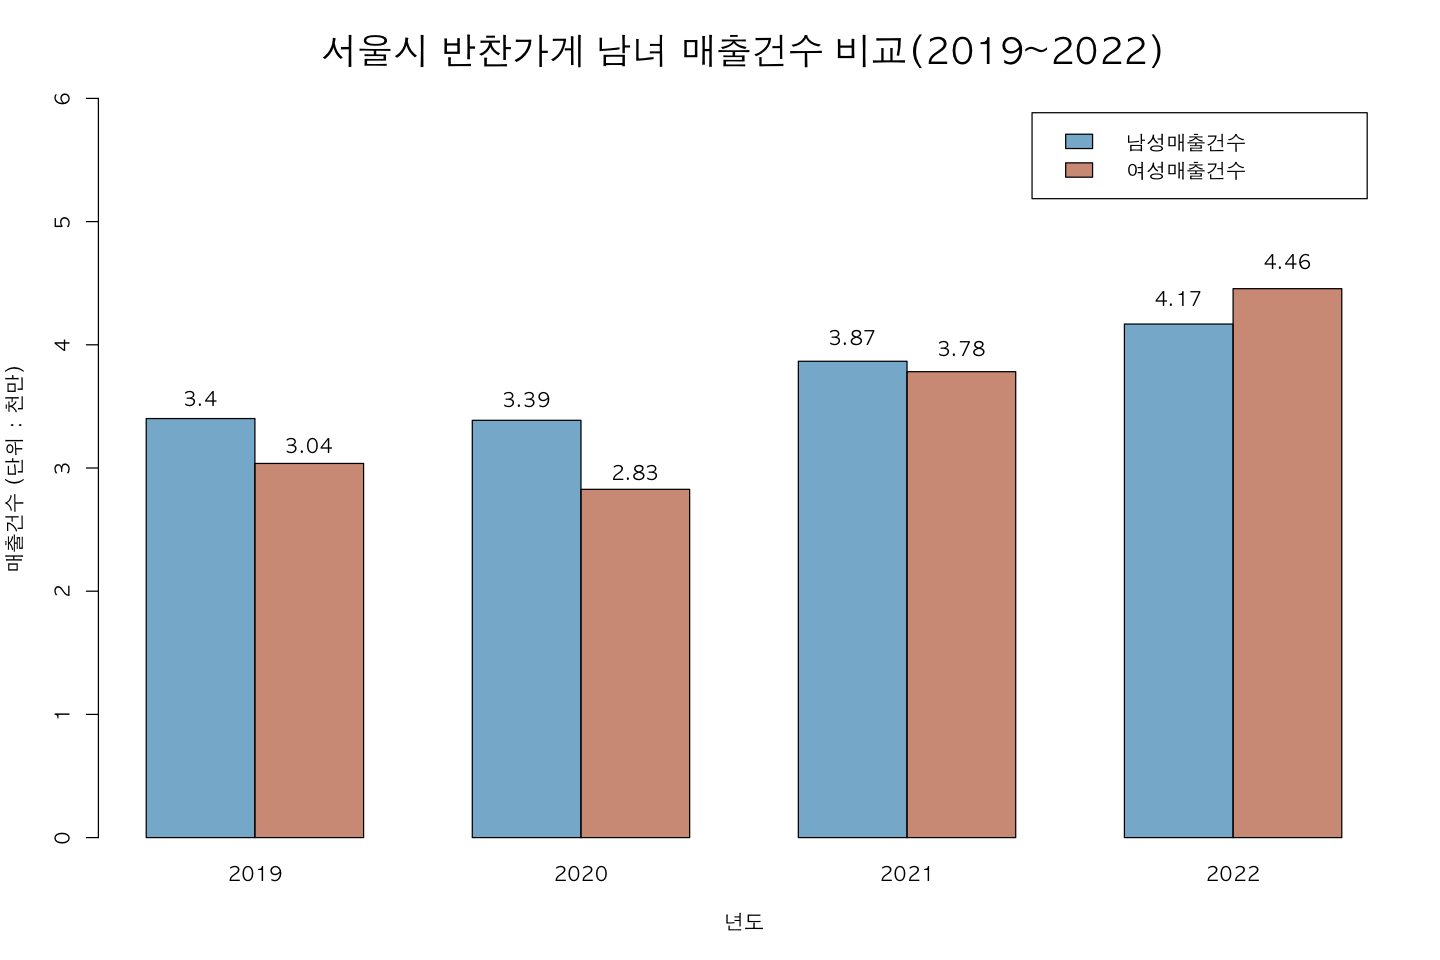

In [ ]:
## 남녀 매출건수
options(repr.plot.width =12, repr.plot.height = 8)
par(bg ='white', family= 'applegothic')

x<-banchan_y_결과[3:4,]/10000000 #천만
barplot(x,
    beside =T,
    # space = c(0.2,0.1),
    main = "서울시 반찬가게 남녀 매출건수 비교(2019~2022)",
    col = c(rgb(0.1,0.5,0.7,0.6),rgb(0.7,0.3,0.1,0.6)),
    ylab = "매출건수 (단위 : 천만)",
    xlab = "년도",
    ylim = c(0,trunc(max(x)*1.5)),
    cex.main =1.8,
    legend.text =T
)
xpos <- 1.5
for(i in seq(1,length(x),1)){
    text(xpos, x[i]*1.05, paste(round(x[i],2)))
    if(i%%2==1){
        xpos<- xpos +1.
    }else{
        xpos<- xpos +2. # 년도 
    }
}

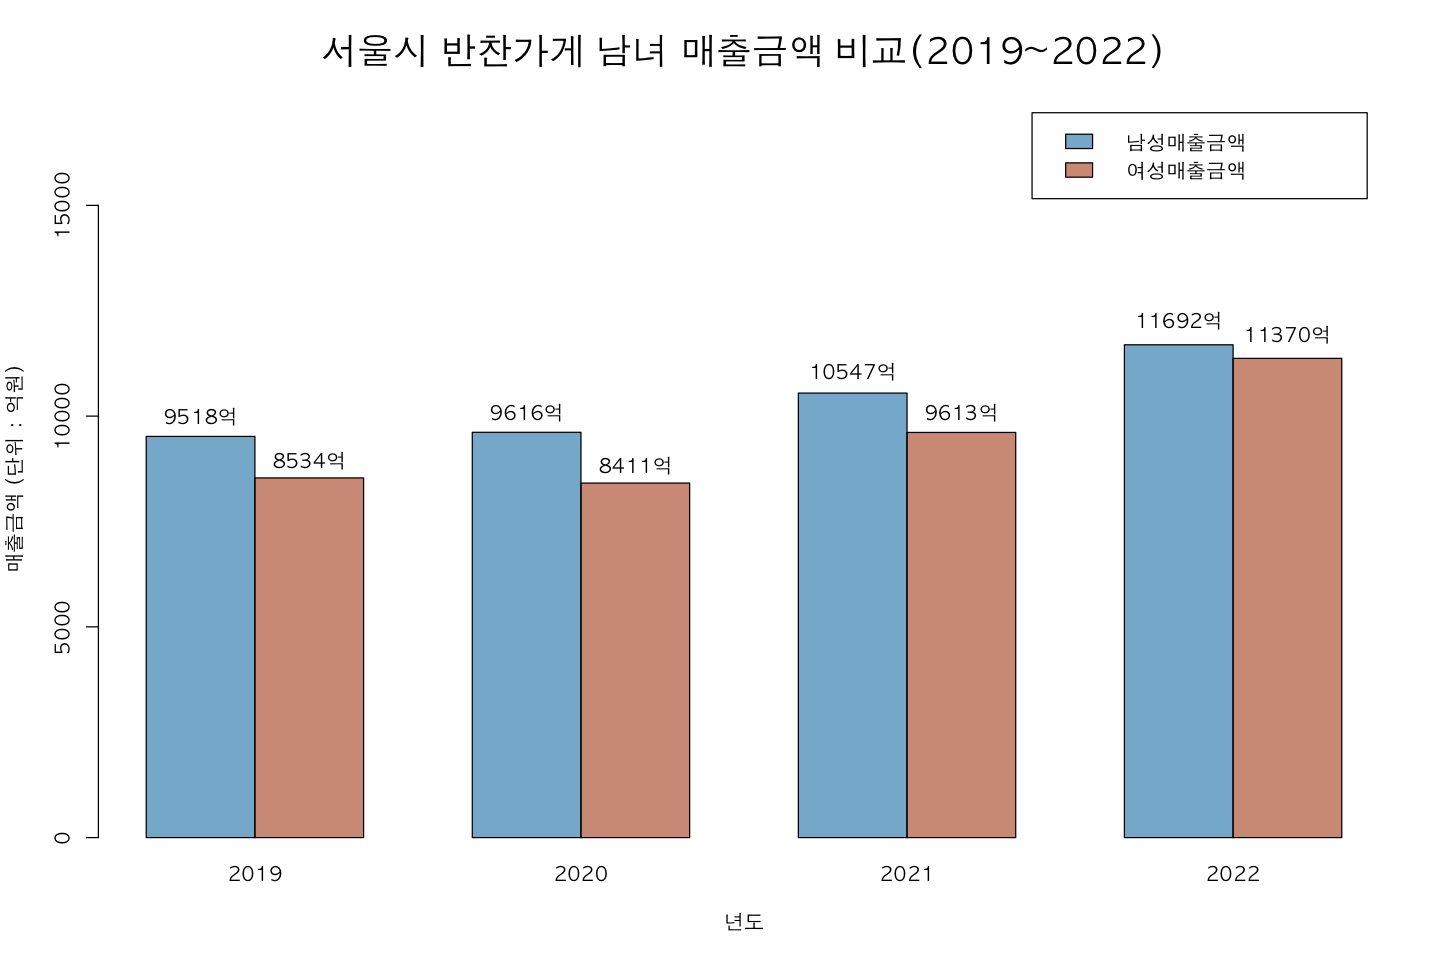

In [ ]:
## 남녀 매출금액
options(repr.plot.width =12, repr.plot.height = 8)
par(bg ='white', family= 'applegothic')

x<-banchan_y_결과[1:2,]/100000000# 억
barplot(x,
    beside =T,
    # space = c(0.2,0.1),
    main = "서울시 반찬가게 남녀 매출금액 비교(2019~2022)",
    col = c(rgb(0.1,0.5,0.7,0.6),rgb(0.7,0.3,0.1,0.6)),
    ylab = "매출금액 (단위 : 억원)",
    xlab = "년도",
    ylim = c(0,trunc(max(x)*1.5)),
    cex.main =1.8,
    legend.text =T
)
xpos <- 1.5
for(i in seq(1,length(x),1)){
    text(xpos, x[i]*1.05, paste(round(x[i],0),"억",sep = ""))
    if(i%%2==1){
        xpos<- xpos +1.
    }else{
        xpos<- xpos +2. # 년도 
    }
}

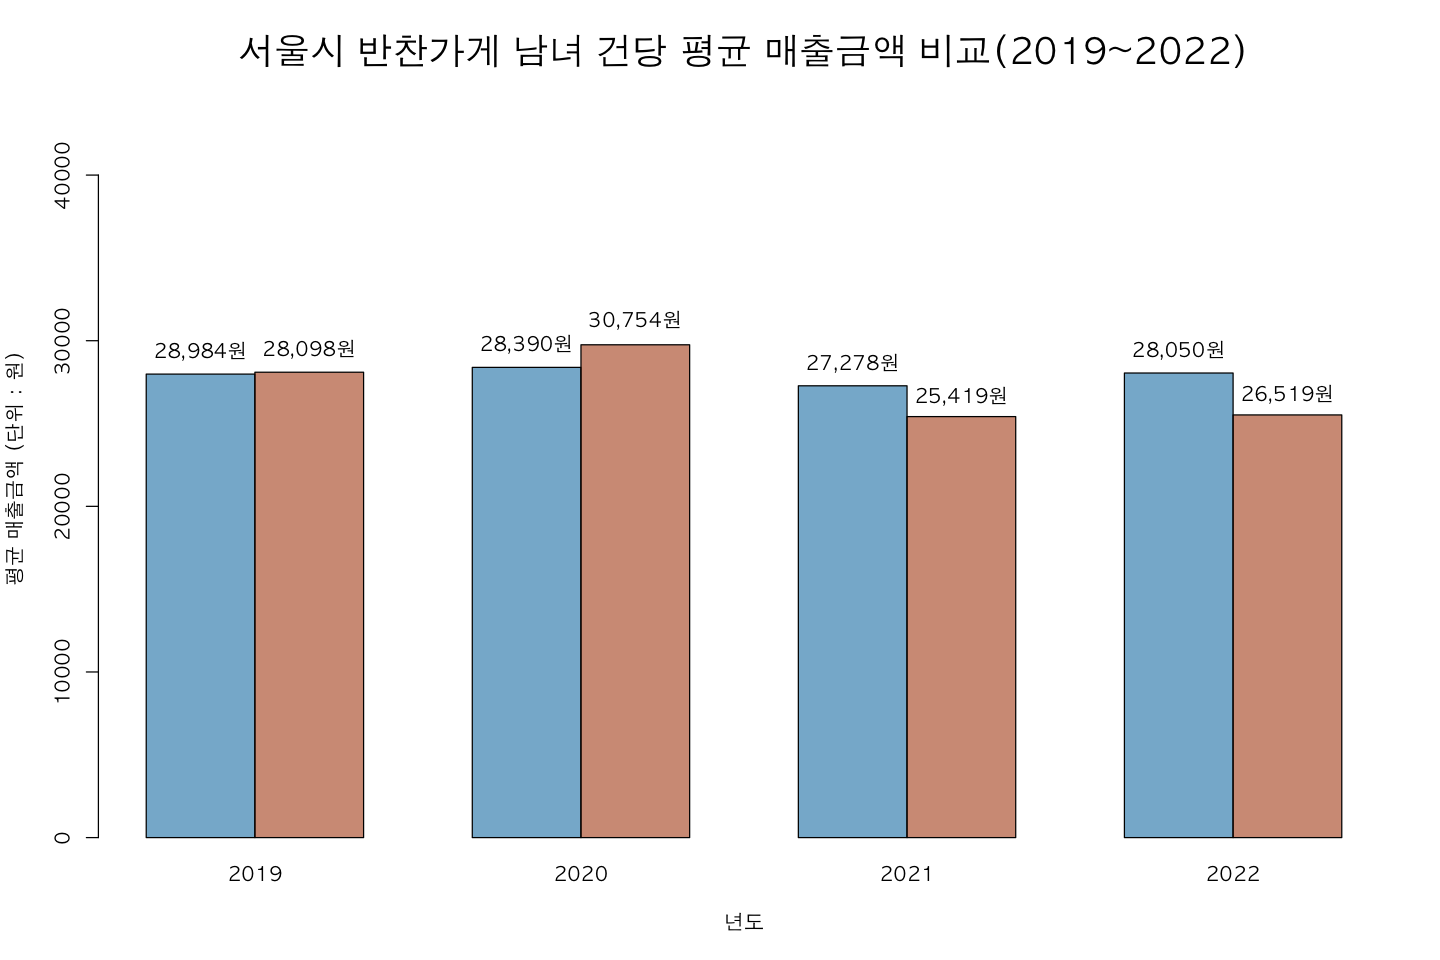

In [ ]:
## 남녀 건당 평균 매출금액
options(repr.plot.width =12, repr.plot.height = 8)
par(bg ='white', family= 'applegothic')

x<-banchan_y_결과[1:2,]/banchan_y_결과[3:4,]# 억
barplot(x,
    beside =T,
    # space = c(0.2,0.1),
    main = "서울시 반찬가게 남녀 건당 평균 매출금액 비교(2019~2022)",
    col = c(rgb(0.1,0.5,0.7,0.6),rgb(0.7,0.3,0.1,0.6)),
    ylab = "평균 매출금액 (단위 : 원)",
    xlab = "년도",
    ylim = c(0,trunc(max(x)*1.5)),
    cex.main =1.8,
 
)
xpos <- 1.5
for(i in seq(1,length(x),1)){
    text(xpos, x[i]*1.05,
        paste(round(x[i]/1000,0),",",ifelse(round(x[i]%%1000,0)<100,paste("0",round(x[i]%%1000,0),sep=""),round(x[i]%%1000,0)),"원",sep = "")) 
    if(i%%2==1){
        xpos<- xpos +1.
    }else{
        xpos<- xpos +2. # 년도 
    }
}

### 그래프분석
- 2020년 여성 매출 건수 감소, 
- 2020년 여성 1건당 매출 금액 증가 
결론 :코로나 발생 시국에 남성보다 여성이 한번에 더 많은 반찬을 샀음. 
<a href="asdfdasf">asdf</a>

# 3. 연령대별 평균 매출 금액비교

&emsp; - 연령대별 매출 금액 비교 - pie chart <br>
&emsp; - 분기순 그래프(남,녀,연령대별, 매출건수, 매출금액,  ) - line plot <br>
&emsp; - 주중 주말 매출 금액 비교 <br>
&emsp; - 분기별 매출 금액 비교 (여자) <br>


In [13]:
# 연령별 매출건수, 매출액  테이블 
banchan_age<-banchan[,c(1,11:16)]
head(banchan_age)

# 년도,분기 데이터 추가
banchan_age$년도 <-as.integer(substring(banchan_age$`기준_년분기_코드`, first = 1, last =4)); # years
banchan_age$분기 <-as.integer(substring(banchan_age$`기준_년분기_코드`, 5));
colnames(banchan_age)
head(banchan_age)
# 연령대라는 글자가 있는 칼럼 개수 
age_num<-sum(ifelse(str_detect(colnames(banchan_age),'연령대'), 1,0))
age_str <- ifelse(str_detect(colnames(banchan_age),'연령대'), colnames(banchan_age),0)
age_str<-age_str[which(age_str!=0)]
age_str[1]

banchan_age_year<-aggregate( 연령대_10_매출_금액~년도 , banchan_age, sum)

banchan_age_year$연령대_20_매출_금액<-aggregate( 연령대_20_매출_금액~년도 , banchan_age, sum)$연령대_20_매출_금액
banchan_age_year$연령대_30_매출_금액<-aggregate( 연령대_30_매출_금액~년도 , banchan_age, sum)$연령대_30_매출_금액
banchan_age_year$연령대_40_매출_금액<-aggregate( 연령대_40_매출_금액~년도 , banchan_age, sum)$연령대_40_매출_금액
banchan_age_year$연령대_50_매출_금액<-aggregate( 연령대_50_매출_금액~년도 , banchan_age, sum)$연령대_50_매출_금액
banchan_age_year$연령대_60_이상_매출_금액<-aggregate( 연령대_60_이상_매출_금액~년도 , banchan_age, sum)$연령대_60_이상_매출_금액
rownames(banchan_age_year)<-banchan_age_year$년도
colnames(banchan_age_year)<-c("년도","10대","20대","30대","40대","50대","60대 이상")

banchan_age_year_matrix<-t(banchan_age_year[,-1])
banchan_age_year_matrix

,기준_년분기_코드,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,20194,96656785,14894224424,38143585171,46633223700,40998435373,25081065510
2,20192,168287618,8623136119,31840002206,42546718273,38327852497,24160270161
3,20193,25672945,10535696879,32064741666,41364671214,38816299865,25202979704
4,20191,43803762,8719782139,27933194905,42230529819,34811124536,22963230567
5,20191,203943277,4372280607,4712542852,4601728486,3589017165,1811366355
6,20192,359615806,4569084910,3632667933,3617553719,3175387656,1327421194


[1] "기준_년분기_코드"         "연령대_10_매출_금액"     
[3] "연령대_20_매출_금액"      "연령대_30_매출_금액"     
[5] "연령대_40_매출_금액"      "연령대_50_매출_금액"     
[7] "연령대_60_이상_매출_금액" "년도"                    
[9] "분기"

,기준_년분기_코드,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,년도,분기
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,20194,96656785,14894224424,38143585171,46633223700,40998435373,25081065510,2019,4
2,20192,168287618,8623136119,31840002206,42546718273,38327852497,24160270161,2019,2
3,20193,25672945,10535696879,32064741666,41364671214,38816299865,25202979704,2019,3
4,20191,43803762,8719782139,27933194905,42230529819,34811124536,22963230567,2019,1
5,20191,203943277,4372280607,4712542852,4601728486,3589017165,1811366355,2019,1
6,20192,359615806,4569084910,3632667933,3617553719,3175387656,1327421194,2019,2


[1] "연령대_10_매출_금액"

,2019,2020,2021,2022
10대,3735473383,1422666587,2067003859,3554046550
20대,135738593655,113527461478,122357633815,143194844641
30대,348674493784,345284302544,340306263654,371853982833
40대,460283136759,423545772291,498128534567,544251292315
50대,482647894921,463753462469,499667744842,552495043190
60대 이상,374117867647,455158628162,553381370272,690894449132


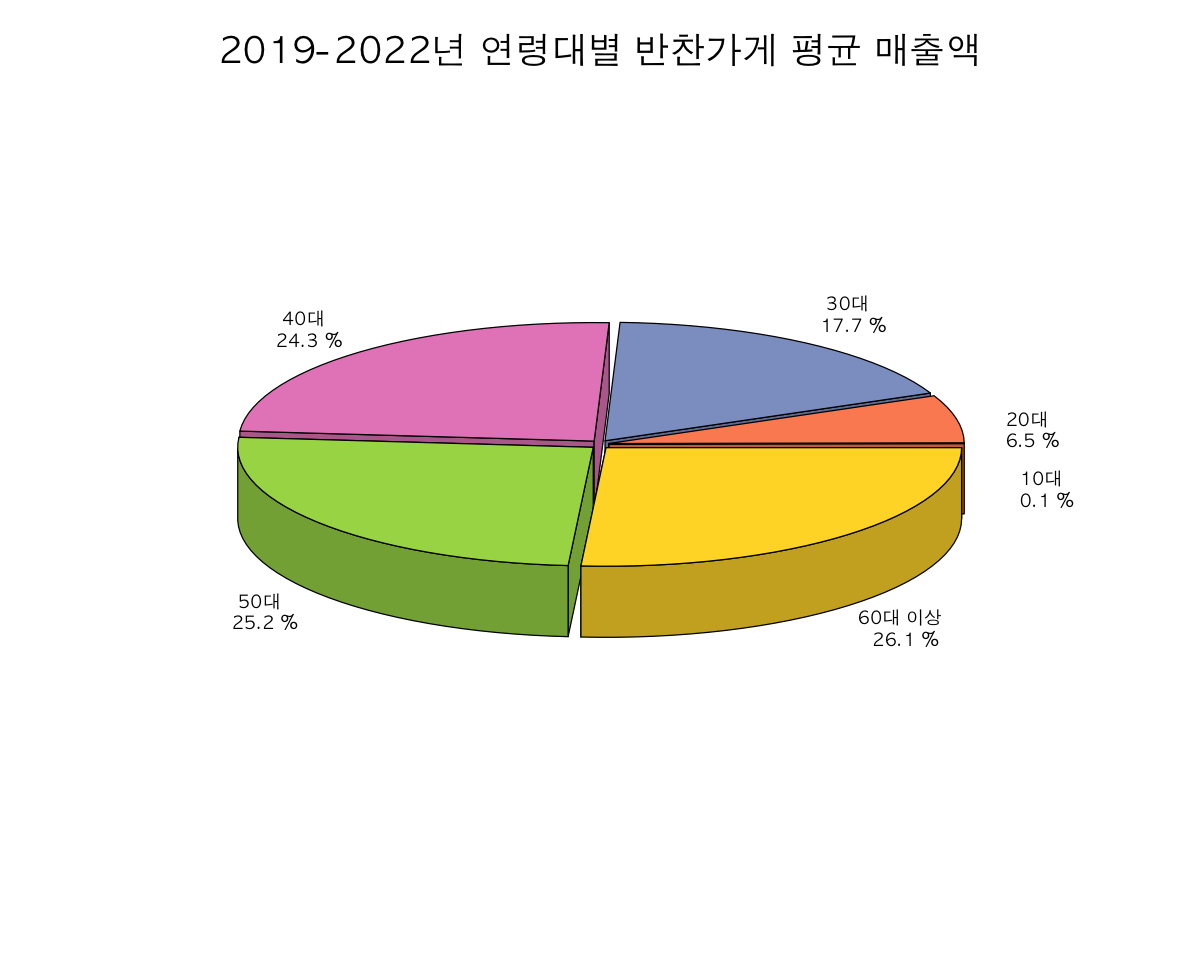

In [89]:
#2019-2022년 연령대별 반찬가게 평균 매출액
par(bg = 'white', family = 'Applegothic')
options(repr.plot.width =10, repr.plot.height=8 )
banchan_age_year<-subset(banchan_age_year,select = -년도)
banchan_age_year_sum<-apply(banchan_age_year,2,sum)


label <-paste(  rownames(banchan_age_year_matrix),"\n",
                round(banchan_age_year_sum/sum(banchan_age_year_sum)*100,1),"%"
                )

pie3D(round(banchan_age_year_sum/sum(banchan_age_year_sum)*100,1),
    main = '2019-2022년 연령대별 반찬가게 평균 매출액',
    col = brewer.pal(6, "Set2") ,
    labels =label,
    cex=1.1,
    explode =0.025,
    labelcex =0.9,
    cex.main =1.8,
    #theta = 0.58
)

<그래프 분석>
-  평균적으로 60 대이상 연령대가 가 가장 많은 매출, 10대-20대는 매출이 적음. <br>
-> 년도별로 각 연령대의 매출액 트랜드를 볼수있는가?

,2019,2020,2021,2022
10대,3735473383,1422666587,2067003859,3554046550
20대,135738593655,113527461478,122357633815,143194844641
30대,348674493784,345284302544,340306263654,371853982833
40대,460283136759,423545772291,498128534567,544251292315
50대,482647894921,463753462469,499667744842,552495043190
60대 이상,374117867647,455158628162,553381370272,690894449132


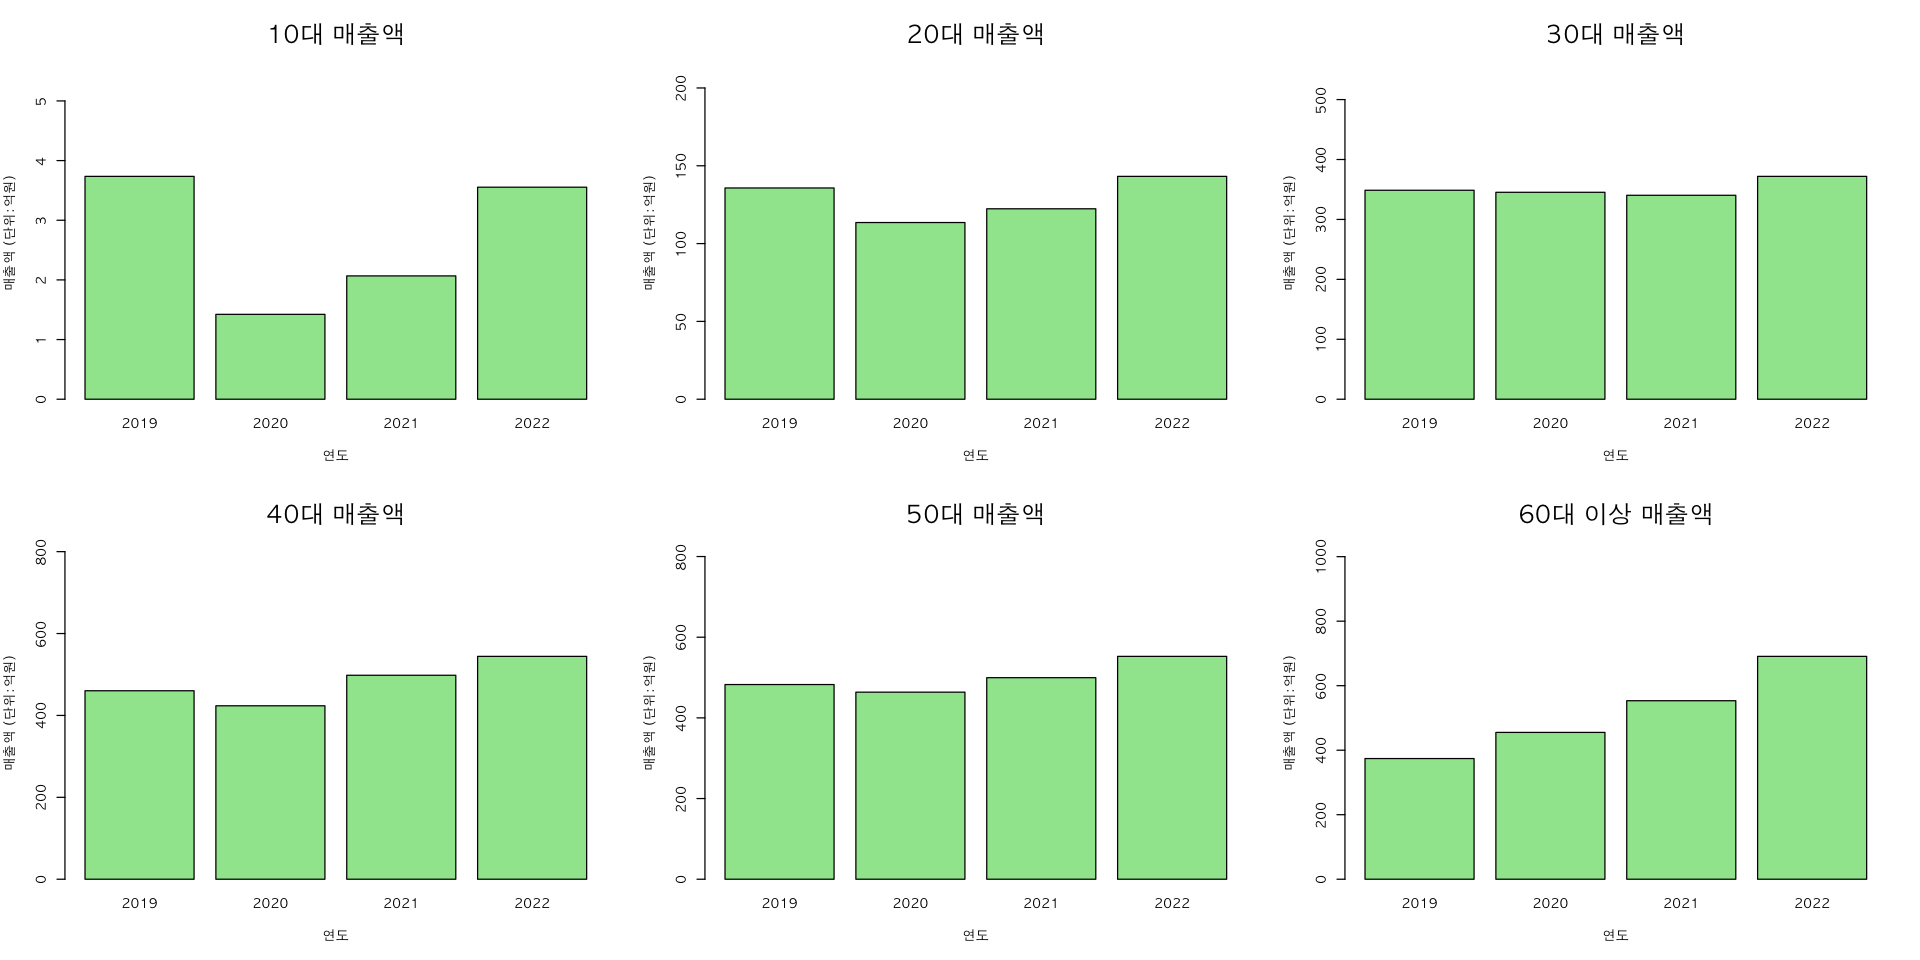

In [90]:
# 10 대의 연도별 매출액 
par(bg= 'white', family= 'AppleGothic')
options(repr.plot.width = 16, repr.plot.height=8)
banchan_age_year_matrix
par(mfrow =c(2,3))

for(i in seq(1,6,1)){
    barplot(banchan_age_year_matrix[i,]/1000000000, 
                main = ifelse(i==6,paste(i,"0대 이상 매출액",sep=""),paste(i,"0대 매출액",sep="")),
                ylab ="매출액 (단위:억원)",
                xlab ="연도",
                col= rgb(0.1,0.8,0.1,0.5),
                ylim =c(0,max(banchan_age_year_matrix[i,]/1000000000)*1.5),
                cex.main =1.85
                )

}




<그래프 분석>
- 10대 매출액은 전체 매출액에서 차지하는부분이 매우작으나 가장많은 비율을 차지하는 60대 이상 매출액은 시간이 갈수록 지속적으로 성장하고있음
- 인구고령화로인한 요인이라고 보기에는 고작 3년동안의 변화임.  반찬가게 비지니스 포커스가 60대 입맛에 맞게 적응하고있다고 볼수도 있음. 


# 4.상권별 분기별 매출액

In [218]:
# banchan_age<-subset(banchan,상권_구분_코드_명=="발달상권" )[,c(1,11:16)]
banchan_age<-banchan[,c(1,11:16)]
head(banchan_age)
#banchan_age[1]
banchan.age10<-aggregate(연령대_10_매출_금액~기준_년분기_코드,banchan_age,sum)
banchan.age20<-aggregate(연령대_20_매출_금액~기준_년분기_코드,banchan_age,sum)
banchan.age30<-aggregate(연령대_30_매출_금액~기준_년분기_코드,banchan_age,sum)
banchan.age40<-aggregate(연령대_40_매출_금액~기준_년분기_코드,banchan_age,sum)
banchan.age50<-aggregate(연령대_50_매출_금액~기준_년분기_코드,banchan_age,sum)
banchan.age60<-aggregate(연령대_60_이상_매출_금액~기준_년분기_코드,banchan_age,sum)
banchan_age <- data.frame(
    연령대_10_매출_금액 = banchan.age10$연령대_10_매출_금액,
    연령대_20_매출_금액 = banchan.age20$연령대_20_매출_금액,
    연령대_30_매출_금액 = banchan.age30$연령대_30_매출_금액,
    연령대_40_매출_금액 = banchan.age40$연령대_40_매출_금액,
    연령대_50_매출_금액 = banchan.age50$연령대_50_매출_금액,
    연령대_60_이상_매출_금액 = banchan.age60$연령대_60_이상_매출_금액
)
head(banchan_age)

,기준_년분기_코드,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,20194,96656785,14894224424,38143585171,46633223700,40998435373,25081065510
2,20192,168287618,8623136119,31840002206,42546718273,38327852497,24160270161
3,20193,25672945,10535696879,32064741666,41364671214,38816299865,25202979704
4,20191,43803762,8719782139,27933194905,42230529819,34811124536,22963230567
5,20191,203943277,4372280607,4712542852,4601728486,3589017165,1811366355
6,20192,359615806,4569084910,3632667933,3617553719,3175387656,1327421194


,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,633734328,29307944179,80715229587,114533225013,111592151734,87170170174
2,1277062098,30834769193,86291921277,113032152018,120796291823,89035322172
3,679112881,33054401419,83422545440,110814350794,123705022366,98907684255
4,1145564076,42541478864,98244797480,121903408934,126554428998,99004691046
5,186253933,28087981754,81242440727,102536707842,111017637104,96860168122
6,386355364,26938272898,86176568665,110191847825,113314499150,120489038449


[1] "2019_4/4" "2020_4/4" "2021_4/4" "2022_4/4"

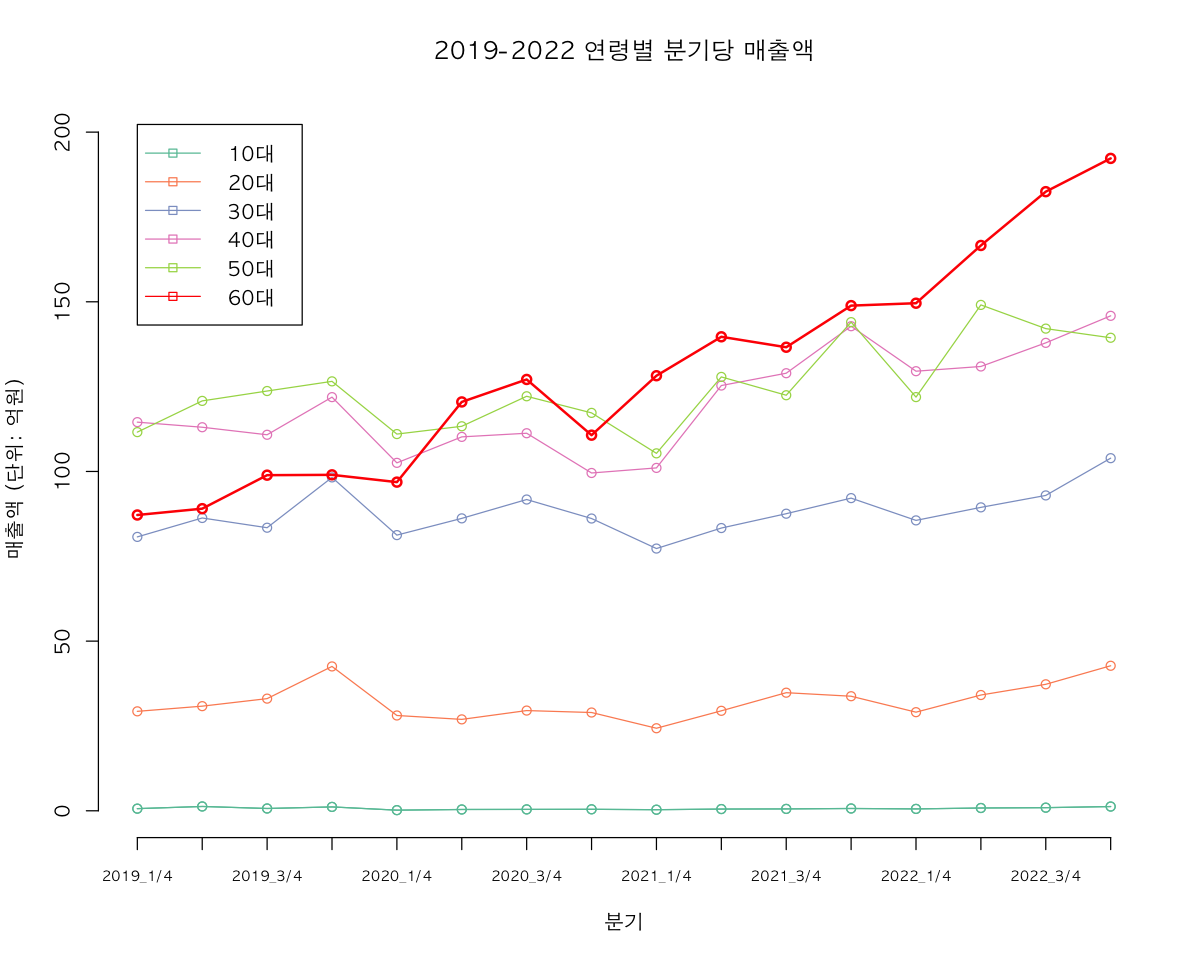

In [306]:
# 분기  지날때 연령별 매출액 추이


milion =1000000000
par(bg='white',family = 'applegothic')
options(repr.plot.width =10, repr.plot.height =8)

col2= c(brewer.pal(5, "Set2"),'red')
#col2 =rgb(seq(0.1,0.5,0.5/6),seq(0.5,1,0.5/6),0.8,seq(0.5,1,0.5/6))
xlabel <-sort(unique(banchan$`기준_년분기_코드`),decreasing = F)
xlabel<-paste(  substring(as.character(xlabel),first=1,last=4), "_",
                substring(as.character(xlabel),5),"/4",sep = "")

plot(   seq(1,length(banchan.age60[,2]),1),
        banchan_age[,1]/milion,
        type = "o",
        ylab = "매출액 (단위: 억원)",
        xlab = "분기",
        ylim = c(min(banchan.age10[,2]/milion)*0.9,max(banchan.age60[,2]/milion)*1.05),
        col=col2[1],
        main="2019-2022 연령별 분기당 매출액",
        axes = F, # x,y 축 제거
        
        
)
# Graph 설정
xlabel[seq(0,16,4)]
axis(1, at = 1:16, labels = xlabel[seq(1,16,1)], cex.axis = 0.7)
axis(2)  # y 축 추가
lwd2=c(rep(1,5),2)
for (i in seq(1,ncol(banchan_age),1)){
    lines(
        seq(1,length(banchan.age60[,2]),1),
        banchan_age[,i]/milion,
        pch = 21,
        type ="o",
        col =col2[i],
        lwd =lwd2[i]
    )
}

legend(1,max(banchan.age60[,2]/milion+10),
    paste(substring(colnames(banchan_age),first=5, last=6), "대",sep = ""),
    col= col2,
    lty = c(1,1),
    pch = c(22,22),
    cex = 1
    #fill=  c("red","green","blue")
)

<그래프 분석>
- 각연령별 매출액중 가장 상승률이 높은 연령은 60대 이상 임. 

# 4. 상권별 매출액 분석